In [1]:
from google.colab import drive
import pandas as pd # Import pandas

drive.mount('/content/drive')



# Load the dataset
df = pd.read_excel('/content/drive/My Drive/SWTD_Model_Results_30_6_25.xlsx')

# Display the first 5 rows
display(df.head())

# Display the column names and their data types
display(df.info())

Mounted at /content/drive


,MO,SC,UA,PD,AD,HEALTH STATE,Y-CANADA,Y-ENGLAND,Y-INDONESIA,Y-JAPAN,...,Y-SLOVANIA,Y-TRINIDAD AND TOBAGGO,Y-SAUDI-ARABIA,Y-MORROCCO,Y-UAE,Y-NORWAY,Y-GHANA,Y-SPAIN,Y-AUSTRALIA,Y-PORTUGAL
0,1,1,1,1,1,11111,0.9489,1.000,1.000,0.9391,...,1.000,1.000,1.000,1.000,1.000,1.000000,1.000,1.000,1.000,1.000
1,1,1,1,1,2,11112,0.9113,0.922,0.921,0.8673,...,0.943,0.980,0.958,0.964,0.938,0.928256,0.968,0.919,0.968,0.964
2,1,1,2,1,1,11211,0.9294,0.950,0.910,0.8887,...,0.952,0.989,0.976,0.979,0.962,0.972792,0.962,0.956,1.000,0.956
3,1,1,1,2,1,11121,0.9045,0.937,0.914,0.8946,...,0.961,0.956,0.961,0.951,0.953,0.940568,0.950,0.922,0.956,0.959
4,1,2,1,1,1,12111,0.9031,0.950,0.899,0.8955,...,0.952,0.976,0.964,0.962,0.943,0.968688,0.948,0.950,0.970,0.952


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3125 entries, 0 to 3124
Data columns (total 49 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   MO                      3125 non-null   int64  
 1   SC                      3125 non-null   int64  
 2   UA                      3125 non-null   int64  
 3   PD                      3125 non-null   int64  
 4   AD                      3125 non-null   int64  
 5   HEALTH STATE            3125 non-null   int64  
 6   Y-CANADA                3125 non-null   float64
 7   Y-ENGLAND               3125 non-null   float64
 8   Y-INDONESIA             3125 non-null   float64
 9   Y-JAPAN                 3125 non-null   float64
 10  Y-CHINA                 3125 non-null   float64
 11  Y-NETHERLANDS           3125 non-null   float64
 12  Y-KOREA                 3125 non-null   float64
 13  Y-URUGUAY               3125 non-null   float64
 14  Y-POLAND                3125 non-null   

None

In [2]:
# Summarize the frequency and range of negative WTD values for each country

# Identify columns starting with 'Y-' as these contain the WTD values for different countries
y_columns = [col for col in df.columns if col.startswith('Y-')]

# Create a dictionary to store the summary for each country
negative_value_summary = {}

# Iterate through each country's WTD column
for col in y_columns:
    # Filter for negative WTD values
    negative_values = df[df[col] < 0][col]

    # Get the count of negative values
    count_negative = negative_values.shape[0]

    # Get the range of negative values (min and max)
    if count_negative > 0:
        min_negative = negative_values.min()
        max_negative = negative_values.max()
        value_range = (min_negative, max_negative)
    else:
        value_range = None # No negative values

    # Store the summary in the dictionary
    negative_value_summary[col] = {
        'count': count_negative,
        'range': value_range
    }

# Print the summary for each country
print("Summary of Negative WTD Values per Country:")
for col, summary in negative_value_summary.items():
    print(f"Column: {col}, Negative Value Count: {summary['count']}, Range: {summary['range']}")

# Calculate overall statistics for all negative WTD values across all countries
all_negative_wtd_values = df[y_columns][df[y_columns] < 0].stack()
descriptive_stats = all_negative_wtd_values.describe()

print("\nOverall Descriptive Statistics for All Negative WTD Values (Across all Countries):")
display(descriptive_stats)

# Check the distribution of each dimension
for dim in ['MO', 'SC', 'UA', 'PD', 'AD']:
    print(f"\nDistribution of {dim} dimension:")
    value_counts = df[dim].value_counts().sort_index()
    display(value_counts)

Summary of Negative WTD Values per Country:
Column: Y-CANADA, Negative Value Count: 57, Range: (-0.1482000000000001, -0.0005999999999999062)
Column: Y-ENGLAND, Negative Value Count: 159, Range: (-0.2850000000000001, -0.0010000000000000564)
Column: Y-INDONESIA, Negative Value Count: 1108, Range: (-0.865, -0.0009999999999998344)
Column: Y-JAPAN, Negative Value Count: 1, Range: (-0.02550000000000005, -0.02550000000000005)
Column: Y-CHINA, Negative Value Count: 315, Range: (-0.391, -0.0009999999999999454)
Column: Y-NETHERLANDS, Negative Value Count: 484, Range: (-0.446, -0.0009999999999999454)
Column: Y-KOREA, Negative Value Count: 4, Range: (-0.06599999999999992, -0.021999999999999936)
Column: Y-URUGUAY, Negative Value Count: 28, Range: (-0.2650000000000001, -0.0010000000000000148)
Column: Y-POLAND, Negative Value Count: 208, Range: (-0.59, -0.0030000000000000304)
Column: Y-TAIWAN, Negative Value Count: 1411, Range: (-1.026, -0.0010000000000000009)
Column: Y-MALAYSIA, Negative Value Count

,0
count,2.262200e+04
mean,-2.199021e-01
std,1.902006e-01
min,-1.491000e+00
25%,-3.160000e-01
50%,-1.680000e-01
75%,-7.300000e-02
max,-3.816392e-17



Distribution of MO dimension:


,count
MO,
1,625
2,625
3,625
4,625
5,625



Distribution of SC dimension:


,count
SC,
1,625
2,625
3,625
4,625
5,625



Distribution of UA dimension:


,count
UA,
1,625
2,625
3,625
4,625
5,625



Distribution of PD dimension:


,count
PD,
1,625
2,625
3,625
4,625
5,625



Distribution of AD dimension:


,count
AD,
1,625
2,625
3,625
4,625
5,625


In [3]:
# Print the summary of negative WTD values per country with 4 decimal places
print("Summary of Negative WTD Values per Country:")
for col, summary in negative_value_summary.items():
    count = summary['count']
    if count > 0:
        min_neg = summary['range'][0]
        max_neg = summary['range'][1]
        print(f"Column: {col}, Negative Value Count: {count}, Range: ({min_neg:.4f}, {max_neg:.4f})")
    else:
        print(f"Column: {col}, Negative Value Count: {count}, Range: No negative values")

Summary of Negative WTD Values per Country:
Column: Y-CANADA, Negative Value Count: 57, Range: (-0.1482, -0.0006)
Column: Y-ENGLAND, Negative Value Count: 159, Range: (-0.2850, -0.0010)
Column: Y-INDONESIA, Negative Value Count: 1108, Range: (-0.8650, -0.0010)
Column: Y-JAPAN, Negative Value Count: 1, Range: (-0.0255, -0.0255)
Column: Y-CHINA, Negative Value Count: 315, Range: (-0.3910, -0.0010)
Column: Y-NETHERLANDS, Negative Value Count: 484, Range: (-0.4460, -0.0010)
Column: Y-KOREA, Negative Value Count: 4, Range: (-0.0660, -0.0220)
Column: Y-URUGUAY, Negative Value Count: 28, Range: (-0.2650, -0.0010)
Column: Y-POLAND, Negative Value Count: 208, Range: (-0.5900, -0.0030)
Column: Y-TAIWAN, Negative Value Count: 1411, Range: (-1.0260, -0.0010)
Column: Y-MALAYSIA, Negative Value Count: 281, Range: (-0.4410, -0.0010)
Column: Y-IRELAND, Negative Value Count: 1124, Range: (-0.9740, -0.0010)
Column: Y-THAILAND, Negative Value Count: 187, Range: (-0.4200, -0.0020)
Column: Y-GERMANY, Negat



There are 1979 unique health states associated with negative WTD values in this dataset.
The top 10 most common negative health states (based on their frequency in rows with at least one negative WTD value) each appear only once in the dataset within rows that have negative WTD values. This is likely a consequence of the dataset's uniform distribution across all possible health states.
For the most common health state '55555', it is associated with negative WTD values in 39 out of the 43 countries.


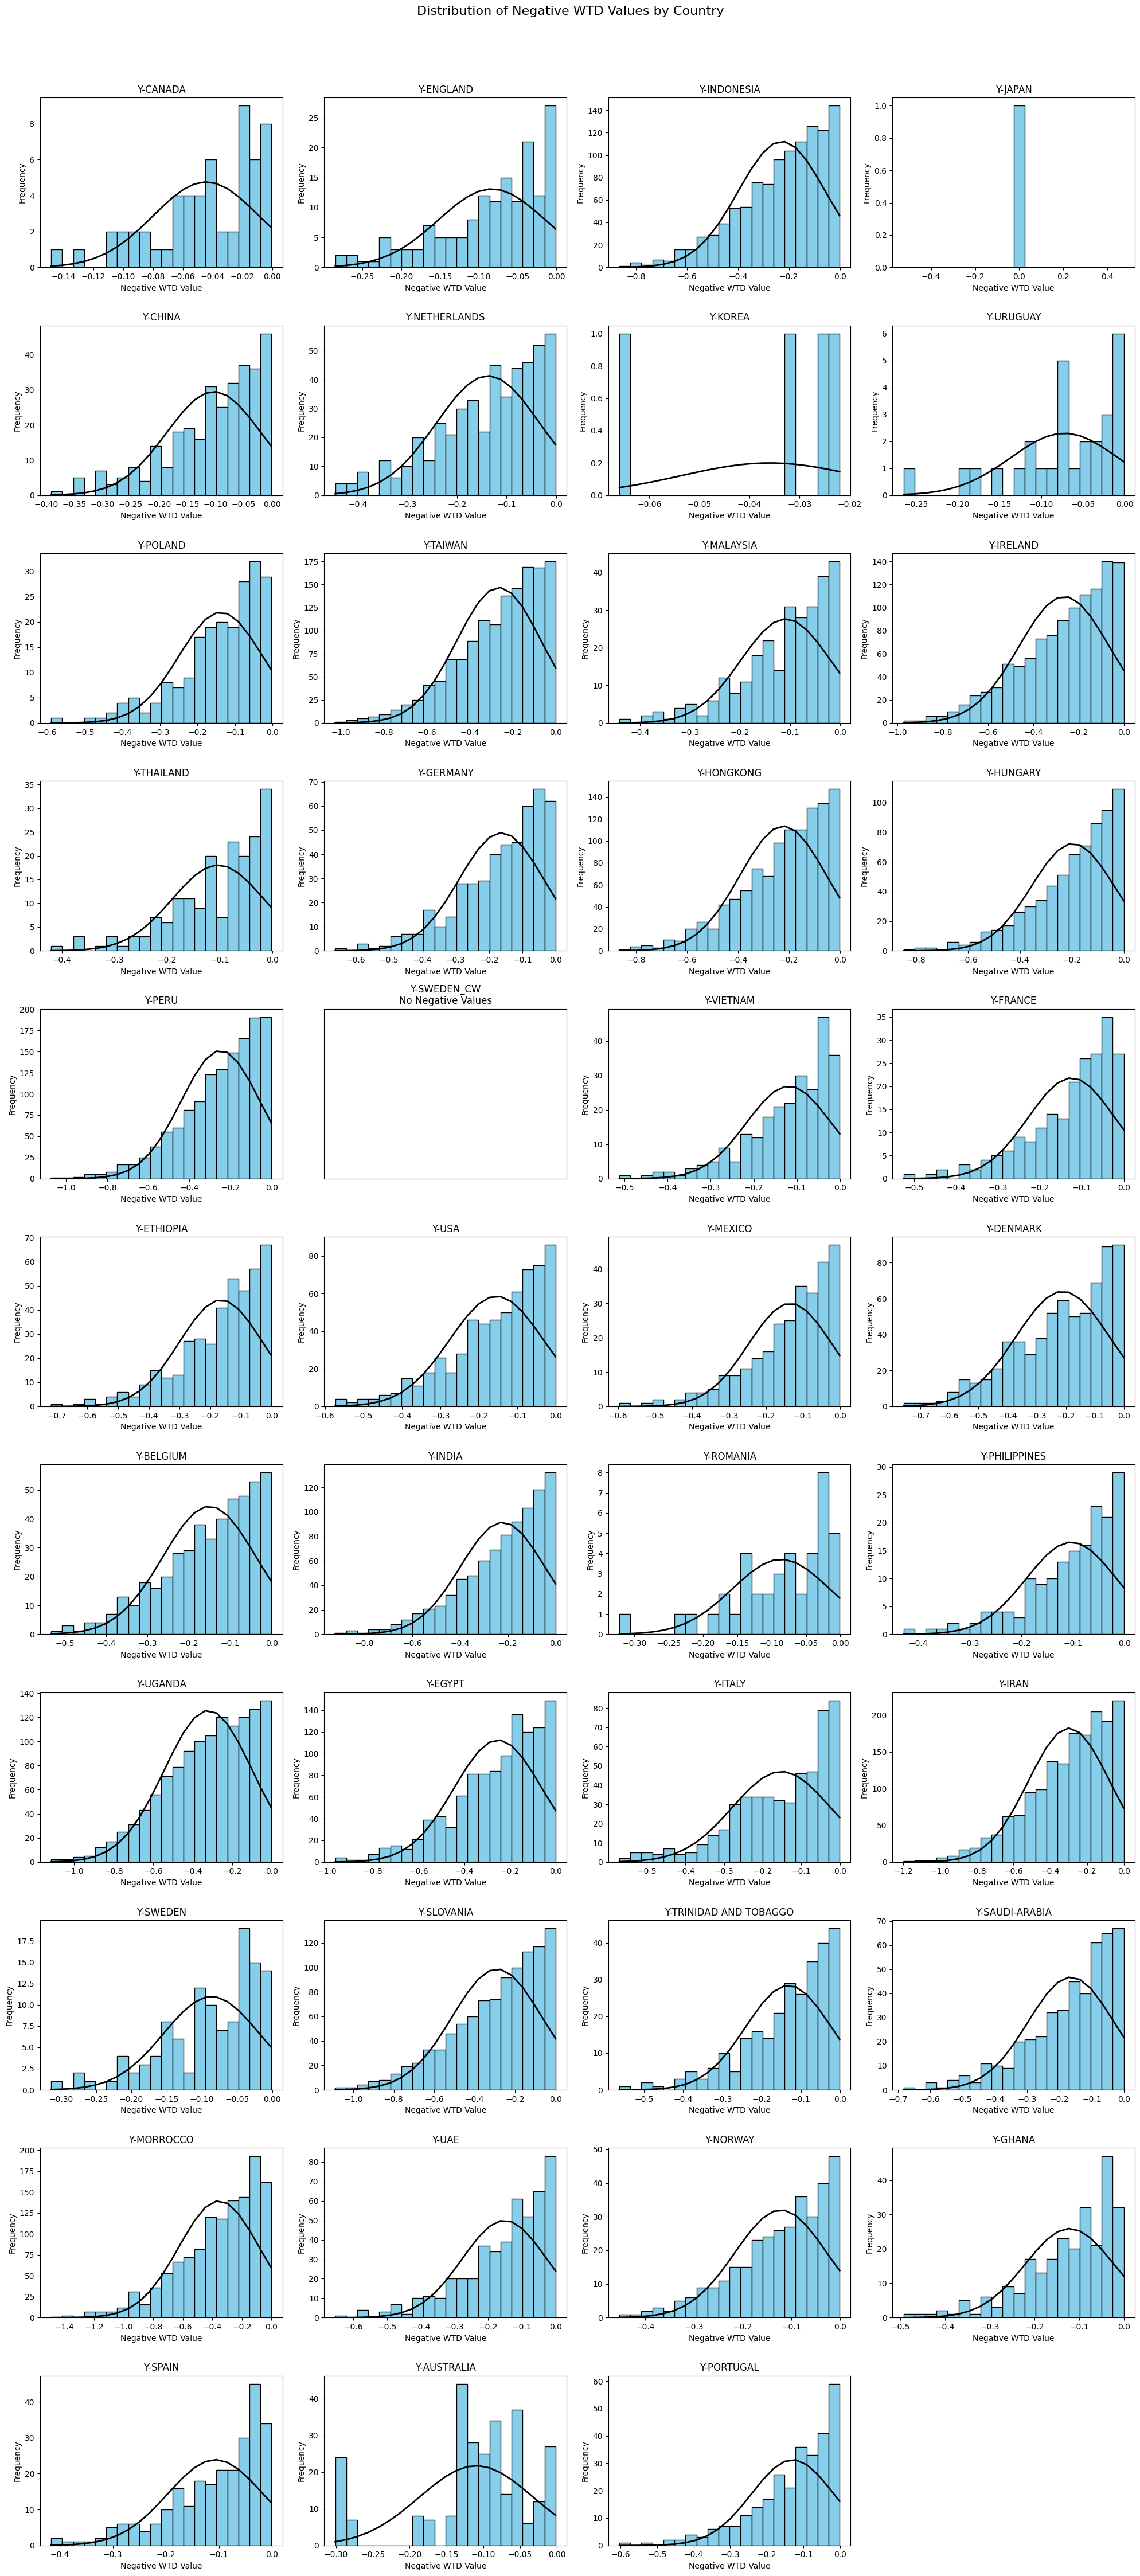

In [33]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

# Identify columns starting with 'Y-'
y_columns = [col for col in df.columns if col.startswith('Y-')]

# Determine the number of rows and columns for the subplots
n_cols = 4  # Adjust as needed for readability
n_rows = (len(y_columns) + n_cols - 1) // n_cols

# Create the figure and subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 5, n_rows * 4))
axes = axes.flatten() # Flatten the 2D array of axes for easy iteration

# Iterate through each 'Y-' column and create a histogram with normal distribution line
for i, col in enumerate(y_columns):
    negative_values = df[df[col] < 0][col]

    if not negative_values.empty:
        # Plot histogram
        # Use density=False (default) for frequency counts on y-axis
        n, bins, patches = axes[i].hist(negative_values, bins=20, color='skyblue', edgecolor='black', density=False)

        # Calculate mean and standard deviation for the normal distribution
        mu, std = norm.fit(negative_values)

        # Only plot the normal distribution curve if standard deviation is not zero
        if std > 0:
            # Calculate the probability density function (PDF) and scale it to the histogram's frequency
            # The scaling factor is the total number of observations times the bin width
            bin_width = bins[1] - bins[0]
            scale_factor = len(negative_values) * bin_width
            p = norm.pdf(bins, mu, std) * scale_factor

            # Plot the scaled normal distribution curve
            axes[i].plot(bins, p, 'k', linewidth=2)

        axes[i].set_title(col)
        axes[i].set_xlabel("Negative WTD Value")
        axes[i].set_ylabel("Frequency") # Label changed back to Frequency
    else:
        axes[i].set_title(f"{col}\nNo Negative Values")
        axes[i].set_xticks([])
        axes[i].set_yticks([])


# Remove any unused subplots
for j in range(len(y_columns), len(axes)):
    fig.delaxes(axes[j])

# Add a main title and adjust layout
fig.suptitle("Distribution of Negative WTD Values by Country", y=1.02, fontsize=16)
plt.tight_layout()

# Display the figure
plt.show()

In [6]:
# Aggregate negative WTD values by country and calculate the mean
aggregated_negative_wtd = {}

for col in y_columns:
    negative_values = df[df[col] < 0][col]
    if not negative_values.empty:
        aggregated_negative_wtd[col] = negative_values.mean()
    else:
        aggregated_negative_wtd[col] = None # Or 0, depending on how you want to represent countries with no negative values

# Convert the dictionary to a DataFrame
aggregated_df = pd.DataFrame(list(aggregated_negative_wtd.items()), columns=['Country', 'Mean Negative WTD'])

# Display the aggregated DataFrame
display(aggregated_df)

,Country,Mean Negative WTD
0,Y-CANADA,-0.044421
1,Y-ENGLAND,-0.083094
2,Y-INDONESIA,-0.228046
3,Y-JAPAN,-0.025500
4,Y-CHINA,-0.103054
5,Y-NETHERLANDS,-0.137477
6,Y-KOREA,-0.036000
7,Y-URUGUAY,-0.072179
8,Y-POLAND,-0.138192
9,Y-TAIWAN,-0.264342


In [7]:
# Display the overall descriptive statistics for all negative WTD values
print("Overall Descriptive Statistics for All Negative WTD Values (Across all Countries):")
display(descriptive_stats)

# Extract and print the specific values the user asked for
total_negative_count = descriptive_stats['count']
mean_negative_wtd = descriptive_stats['mean']
std_negative_wtd = descriptive_stats['std']

print(f"\nTotal number of negative WTD values across all countries: {total_negative_count:.0f}")
print(f"Mean of all negative WTD values: {mean_negative_wtd:.4f}")
print(f"Standard Deviation of all negative WTD values: {std_negative_wtd:.4f}")

Overall Descriptive Statistics for All Negative WTD Values (Across all Countries):


,0
count,2.262200e+04
mean,-2.199021e-01
std,1.902006e-01
min,-1.491000e+00
25%,-3.160000e-01
50%,-1.680000e-01
75%,-7.300000e-02
max,-3.816392e-17



Total number of negative WTD values across all countries: 22622
Mean of all negative WTD values: -0.2199
Standard Deviation of all negative WTD values: 0.1902


In [8]:
# Count the number of country occurrences of each negative 'HEALTH STATE'

print("Counting country occurrences for each negative 'HEALTH STATE'...")

# Identify columns starting with 'Y-' as these contain the WTD values for different countries
y_columns = [col for col in df.columns if col.startswith('Y-')]

# Identify rows where at least one 'Y-' column has a negative value
df_negative_wtd = df[y_columns] < 0
df_negative = df[df_negative_wtd.any(axis=1)].copy() # Use .copy() to avoid SettingWithCopyWarning

# Identify unique health states in rows with negative WTD values
negative_health_states = df_negative['HEALTH STATE'].unique()


# Create a dictionary to store the count of countries for each negative health state
health_state_country_counts = {}

# Iterate through each unique negative health state
for health_state in negative_health_states:
    # Filter the dataframe to rows with the current health state
    df_health_state = df[df['HEALTH STATE'] == health_state]

    # Count how many 'Y-' columns have at least one negative value in these rows
    countries_with_negative_wtd = []
    for col in y_columns:
        if (df_health_state[col] < 0).any():
            countries_with_negative_wtd.append(col.replace('Y-', ''))

    health_state_country_counts[health_state] = {
        'Number of Countries with Negative WTD': len(countries_with_negative_wtd),
        'Countries': countries_with_negative_wtd
    }

# Sort the results by the number of countries in descending order
sorted_health_state_country_counts = sorted(health_state_country_counts.items(),
                                            key=lambda item: item[1]['Number of Countries with Negative WTD'],
                                            reverse=True)

# Display the results for the top N health states (e.g., top 20)
print("\nTop 20 Negative Health States by Number of Countries with Negative WTD:")
for health_state, data in sorted_health_state_country_counts[:20]:
    print(f"Health State '{health_state}':")
    print(f"  Number of Countries with Negative WTD: {data['Number of Countries with Negative WTD']}")
    print(f"  Countries: {data['Countries']}")

Counting country occurrences for each negative 'HEALTH STATE'...

Top 20 Negative Health States by Number of Countries with Negative WTD:
Health State '55555':
  Number of Countries with Negative WTD: 42
  Countries: ['CANADA', 'ENGLAND', 'INDONESIA', 'JAPAN', 'CHINA', 'NETHERLANDS', 'KOREA', 'URUGUAY', 'POLAND', 'TAIWAN', 'MALAYSIA', 'IRELAND', 'THAILAND', 'GERMANY', 'HONGKONG', 'HUNGARY', 'PERU', 'VIETNAM', 'FRANCE', 'ETHIOPIA', 'USA', 'MEXICO', 'DENMARK', 'BELGIUM', 'INDIA', 'ROMANIA', 'PHILIPPINES', 'UGANDA', 'EGYPT', 'ITALY', 'IRAN', 'SWEDEN', 'SLOVANIA', 'TRINIDAD AND TOBAGGO', 'SAUDI-ARABIA', 'MORROCCO', 'UAE', 'NORWAY', 'GHANA', 'SPAIN', 'AUSTRALIA', 'PORTUGAL']
Health State '55545':
  Number of Countries with Negative WTD: 41
  Countries: ['CANADA', 'ENGLAND', 'INDONESIA', 'CHINA', 'NETHERLANDS', 'KOREA', 'URUGUAY', 'POLAND', 'TAIWAN', 'MALAYSIA', 'IRELAND', 'THAILAND', 'GERMANY', 'HONGKONG', 'HUNGARY', 'PERU', 'VIETNAM', 'FRANCE', 'ETHIOPIA', 'USA', 'MEXICO', 'DENMARK', 'BELG

In [9]:
# Create a DataFrame from the health_state_country_counts dictionary
# The dictionary stores data in a format that's easy to convert to a DataFrame
health_state_summary_df = pd.DataFrame.from_dict(health_state_country_counts, orient='index')

# Rename the index to 'HEALTH STATE'
health_state_summary_df.index.name = 'HEALTH STATE'

# Sort the DataFrame by the number of countries with negative WTD in descending order
health_state_summary_df = health_state_summary_df.sort_values(by='Number of Countries with Negative WTD', ascending=False)

# Define the path to save the Excel file in Google Drive
# Make sure your Google Drive is mounted at /content/drive
excel_file_path = '/content/drive/My Drive/health_state_country_occurrences.xlsx'

# Save the DataFrame to an Excel file in Google Drive
health_state_summary_df.to_excel(excel_file_path)

print(f"Excel table saved to: {excel_file_path}")

# You can find this file in your Google Drive at the specified path.

Excel table saved to: /content/drive/My Drive/health_state_country_occurrences.xlsx


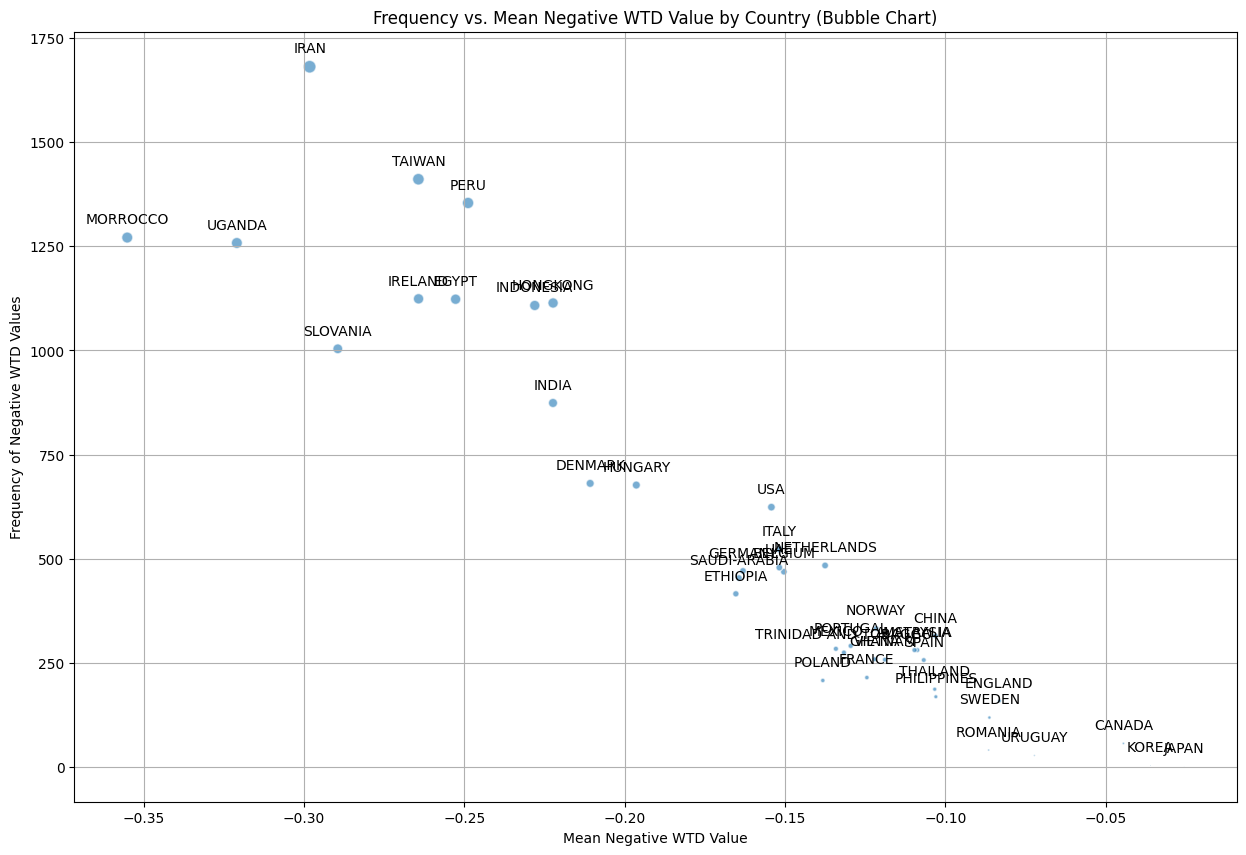

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# Prepare data for the bubble chart
# Use the negative_value_summary dictionary and aggregated_negative_wtd dictionary

chart_data = []
for col in y_columns:
    count = negative_value_summary[col]['count']
    mean_wtd = aggregated_negative_wtd[col]

    if count > 0 and mean_wtd is not None:
        chart_data.append({'country': col.replace('Y-', ''), 'count': count, 'mean_wtd': mean_wtd})

chart_df = pd.DataFrame(chart_data)

# Create the bubble chart
plt.figure(figsize=(15, 10))

# Bubble size will be based on the count of negative values
# Scale the bubble size for better visualization
bubble_size = chart_df['count'] / 20 # Adjust scaling factor as needed

scatter = plt.scatter(chart_df['mean_wtd'], chart_df['count'], s=bubble_size, alpha=0.6, edgecolors="w")

# Add labels and title
plt.xlabel("Mean Negative WTD Value")
plt.ylabel("Frequency of Negative WTD Values")
plt.title("Frequency vs. Mean Negative WTD Value by Country (Bubble Chart)")
plt.grid(True)

# Add annotations for each bubble (country name)
# Adjust annotation position based on the bubble size and location if needed
for i, row in chart_df.iterrows():
    plt.annotate(row['country'], (row['mean_wtd'], row['count']), textcoords="offset points", xytext=(0,10), ha='center')


plt.show()

In [11]:
# Create a dictionary to hold the consolidated metrics
consolidated_metrics = {}

# Iterate through y_columns to get all metrics
for col in y_columns:
    negative_values = df[df[col] < 0][col]
    count = negative_values.shape[0]
    mean_wtd = negative_values.mean()
    std_wtd = negative_values.std()

    # Store metrics, replacing 'Y-' prefix
    country_name = col.replace('Y-', '')
    consolidated_metrics[country_name] = {
        'Frequency': count,
        'Mean Negative WTD': mean_wtd,
        'Std Negative WTD': std_wtd
    }

# Convert the dictionary to a DataFrame
consolidated_df = pd.DataFrame.from_dict(consolidated_metrics, orient='index')

# Fill NaN values for Mean Negative WTD and Std Negative WTD with 0
consolidated_df['Mean Negative WTD'] = consolidated_df['Mean Negative WTD'].fillna(0)
consolidated_df['Std Negative WTD'] = consolidated_df['Std Negative WTD'].fillna(0)

# Display the head and info of the consolidated DataFrame
print("Consolidated Metrics DataFrame Head:")
display(consolidated_df.head())

print("\nConsolidated Metrics DataFrame Info:")
display(consolidated_df.info())

Consolidated Metrics DataFrame Head:


,Frequency,Mean Negative WTD,Std Negative WTD
CANADA,57,-0.044421,0.035586
ENGLAND,159,-0.083094,0.069027
INDONESIA,1108,-0.228046,0.170180
JAPAN,1,-0.025500,0.000000
CHINA,315,-0.103054,0.083261



Consolidated Metrics DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
Index: 43 entries, CANADA to PORTUGAL
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Frequency          43 non-null     int64  
 1   Mean Negative WTD  43 non-null     float64
 2   Std Negative WTD   43 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 1.3+ KB


None

## Choose clustering method

Select an appropriate clustering algorithm (e.g., K-Means, Hierarchical Clustering) based on the nature of the data. K-Means clustering is a suitable method for grouping countries based on the numerical metrics we have consolidated. It aims to partition the data into k clusters, where each data point belongs to the cluster with the nearest mean. Use the elbow method to determine the optimal number of clusters for K-Means clustering on the consolidated country metrics.


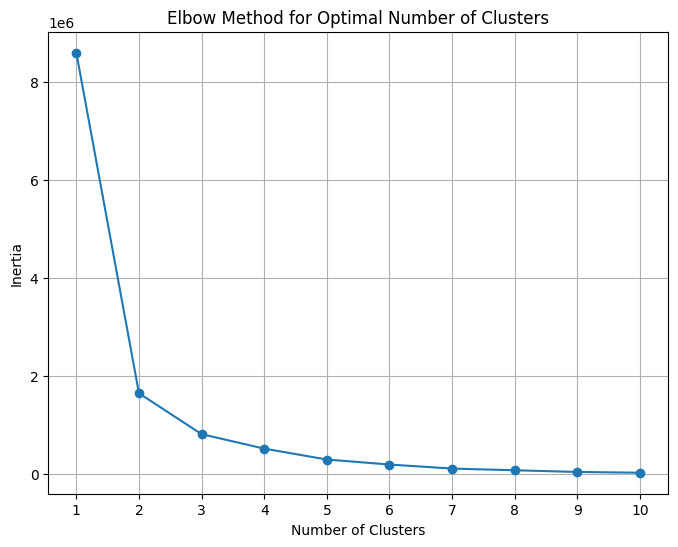

In [12]:
#Implement the elbow method to find the optimal number of clusters for K-Means on the consolidated country metrics by calculating inertia for a range of cluster numbers and then plotting the inertia values.
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Create an empty list to store inertia values
inertia = []

# Define a range of possible cluster numbers
k_range = range(1, 11) # Testing from 1 to 10 clusters

# Iterate through the range of cluster numbers
for k in k_range:
    # Initialize KMeans model
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10) # Set n_init explicitly

    # Fit the model to the data
    kmeans.fit(consolidated_df)

    # Append the inertia to the list
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 6))
plt.plot(k_range, inertia, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal Number of Clusters")
plt.xticks(k_range)
plt.grid(True)
plt.show()


Implement the elbow method to find the optimal number of clusters for K-Means on the consolidated country metrics by calculating inertia for a range of cluster numbers and then plotting the inertia values.



## Apply clustering

Apply the chosen clustering algorithm (K-Means) with the determined optimal number of clusters to group the countries based on the consolidated metrics.



Apply K-Means clustering with the chosen optimal number of clusters (visually determined from the elbow plot) and add the cluster labels to the dataframe.



In [13]:
from sklearn.cluster import KMeans

# Visually inspecting the elbow plot, there isn't a clear sharp elbow,
# but there seems to be a bend around 3 or 4 clusters.
# Let's choose 4 as a reasonable number of clusters for demonstration.
optimal_k = 4

# Initialize KMeans with the chosen number of clusters and random_state for reproducibility
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)

# Fit the KMeans model to the consolidated data
kmeans.fit(consolidated_df)

# Add the cluster labels to the consolidated_df
consolidated_df['Cluster'] = kmeans.labels_

# Display the consolidated_df with the new cluster labels
print(f"Consolidated DataFrame with {optimal_k} Clusters:")
display(consolidated_df)

Consolidated DataFrame with 4 Clusters:


,Frequency,Mean Negative WTD,Std Negative WTD,Cluster
CANADA,57,-0.044421,0.035586,1
ENGLAND,159,-0.083094,0.069027,1
INDONESIA,1108,-0.228046,0.170180,2
JAPAN,1,-0.025500,0.000000,1
CHINA,315,-0.103054,0.083261,1
NETHERLANDS,484,-0.137477,0.103945,3
KOREA,4,-0.036000,0.020347,1
URUGUAY,28,-0.072179,0.065314,1
POLAND,208,-0.138192,0.111319,1
TAIWAN,1411,-0.264342,0.196555,0


## Analyze and characterize clusters


Analyze the characteristics of the countries within each cluster to understand what defines each group.



Group the consolidated_df DataFrame by the 'Cluster' column and calculate descriptive statistics for the numerical columns within each cluster. Then, print the descriptive statistics for each cluster and list the countries belonging to each cluster.



In [14]:
# Group by cluster and calculate descriptive statistics
cluster_summary = consolidated_df.groupby('Cluster')[['Frequency', 'Mean Negative WTD', 'Std Negative WTD']].describe()

# Print the descriptive statistics for each cluster
print("Descriptive Statistics for Each Cluster:")
display(cluster_summary)

# List countries in each cluster
print("\nCountries in Each Cluster:")
for cluster_id in sorted(consolidated_df['Cluster'].unique()):
    countries_in_cluster = consolidated_df[consolidated_df['Cluster'] == cluster_id].index.tolist()
    print(f"Cluster {cluster_id}: {countries_in_cluster}")

Descriptive Statistics for Each Cluster:


Frequency                                                            \
            count         mean         std     min     25%     50%      75%   
Cluster                                                                       
0             5.0  1395.000000  171.666828  1258.0  1271.0  1354.0  1411.00   
1            22.0   182.818182  113.722568     0.0    72.5   211.5   279.50   
2             6.0  1057.833333  100.983992   874.0  1030.0  1111.0  1120.75   
3            10.0   527.800000   96.573288   416.0   469.5   481.5   598.75   

                Mean Negative WTD            ...                      \
            max             count      mean  ...       75%       max   
Cluster                                      ...                       
0        1681.0               5.0 -0.297520  ... -0.264342 -0.248849   
1         333.0              22.0 -0.094930  ... -0.083877  0.000000   
2        1124.0               6.0 -0.246541  ... -0.223780 -0.222328   
3         681.0              10.0 -0.164540  ... -0.151744 -0.137477   

        Std Negative WTD                                                    \
                   count      mean       std       min       25%       50%   
Cluster                                                                      
0                    5.0  0.220337  0.031526  0.191323  0.196555  0.220180   
1                   22.0  0.076427  0.033929  0.000000  0.068249  0.087076   
2                    6.0  0.187867  0.020230  0.169302  0.171599  0.183756   
3                   10.0  0.130245  0.017840  0.103945  0.122411  0.126648   

                             
              75%       max  
Cluster                      
0        0.222667  0.270960  
1        0.098190  0.112657  
2        0.197259  0.221085  
3        0.134303  0.160568  

[4 rows x 24 columns]


Countries in Each Cluster:
Cluster 0: ['TAIWAN', 'PERU', 'UGANDA', 'IRAN', 'MORROCCO']
Cluster 1: ['CANADA', 'ENGLAND', 'JAPAN', 'CHINA', 'KOREA', 'URUGUAY', 'POLAND', 'MALAYSIA', 'THAILAND', 'SWEDEN_CW', 'VIETNAM', 'FRANCE', 'MEXICO', 'ROMANIA', 'PHILIPPINES', 'SWEDEN', 'TRINIDAD AND TOBAGGO', 'NORWAY', 'GHANA', 'SPAIN', 'AUSTRALIA', 'PORTUGAL']
Cluster 2: ['INDONESIA', 'IRELAND', 'HONGKONG', 'INDIA', 'EGYPT', 'SLOVANIA']
Cluster 3: ['NETHERLANDS', 'GERMANY', 'HUNGARY', 'ETHIOPIA', 'USA', 'DENMARK', 'BELGIUM', 'ITALY', 'SAUDI-ARABIA', 'UAE']


## Visualize clusters


Create visualizations (e.g., scatter plots, maps) to display the country groupings.



Create a scatter plot of 'Mean Negative WTD' vs. 'Frequency' from the `consolidated_df` DataFrame, coloring the points by the 'Cluster' column, labeling the axes, adding a title, ensuring a legend is displayed, and adding country names as annotations to each data point.



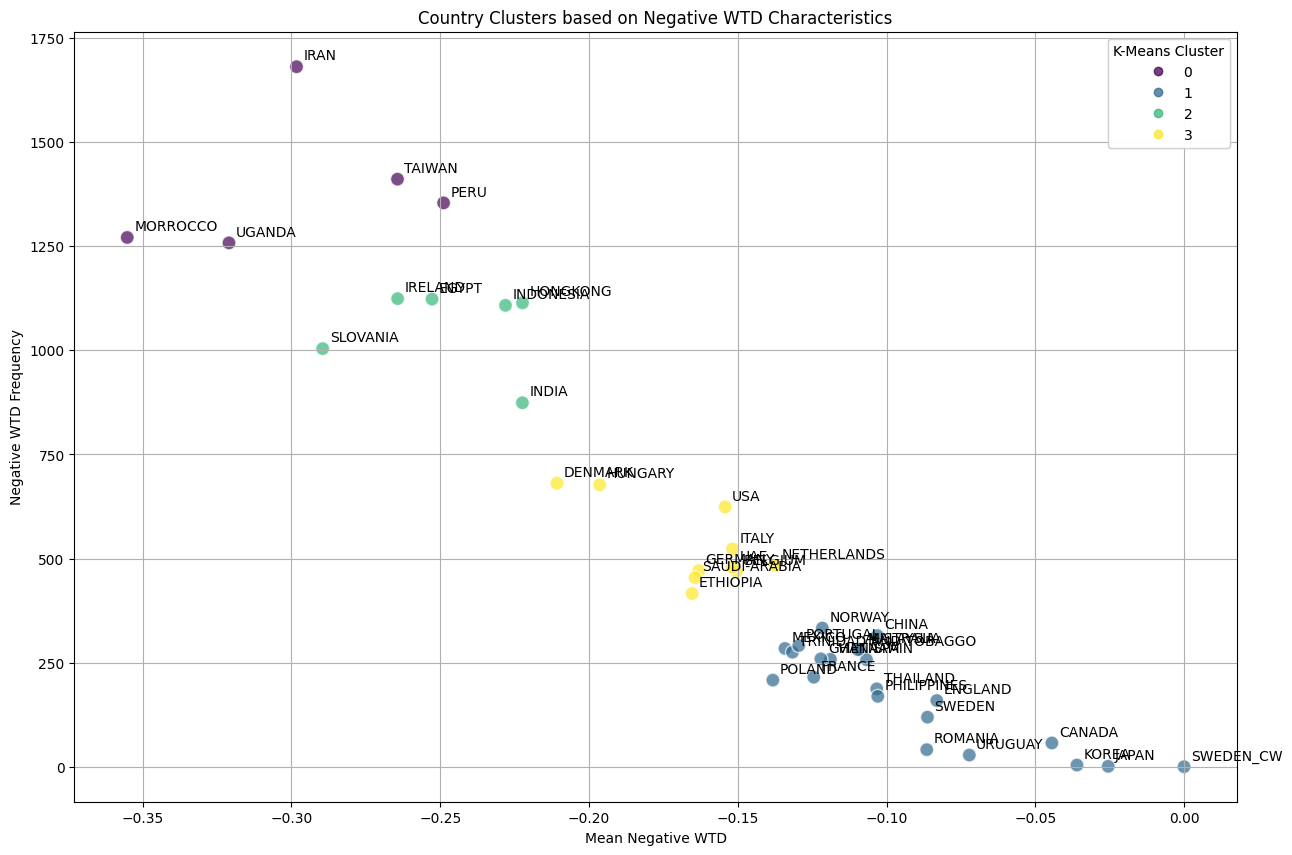

In [15]:
import matplotlib.pyplot as plt

# Create the scatter plot
plt.figure(figsize=(15, 10))

scatter = plt.scatter(consolidated_df['Mean Negative WTD'], consolidated_df['Frequency'],
                      c=consolidated_df['Cluster'], cmap='viridis', s=100, alpha=0.7, edgecolors='w')

# Add labels and title
plt.xlabel("Mean Negative WTD")
plt.ylabel("Negative WTD Frequency")
plt.title("Country Clusters based on Negative WTD Characteristics")

# Add legend
legend = plt.legend(*scatter.legend_elements(), title="K-Means Cluster")
plt.gca().add_artist(legend)

# Add country names as annotations
for i, row in consolidated_df.iterrows():
    plt.annotate(i, (row['Mean Negative WTD'], row['Frequency']), textcoords="offset points", xytext=(5,5), ha='left')

plt.grid(True)
plt.show()

Summary of Clustering Analysis of Countries based on Negative WTD Values:

The K-Means clustering algorithm was applied to group countries based on three key metrics related to negative WTD values: Frequency of negative WTD occurrences, Mean Negative WTD value, and Standard Deviation of Negative WTD values. Based on the elbow method and visual inspection, 4 clusters were determined to be appropriate for this analysis.

Analysis of Cluster Characteristics:

Cluster 2: This cluster generally represents countries with moderate frequencies of negative WTD values and less extreme (closer to zero) mean negative WTD values compared to some other clusters. The standard deviation within this cluster suggests a moderate spread in the negative WTD values. Countries in this cluster include Netherlands, Germany, Hungary, USA, Denmark, Belgium, Ethiopia, Italy, Saudi-Arabia, UAE.

Cluster 1: This is the largest cluster and appears to group countries with relatively low frequencies of negative WTD value and mean negative WTD values that are typically closer to zero. This cluster includes countries with zero negative values as well. The standard deviation is generally lower, indicating less variability in negative WTD values. Countries in this cluster include Canada, England, Japan, China, Korea, Uruguay, Poland, Malaysia, Thailand, Vietnam, France, Mexico, Romania, Philippines, Sweden, Trinidad and Tobaggo, Norway, Ghana, Spain, Portugal, Sweden.

Cluster 0: This cluster is characterized by very high frequencies of negative WTD values and high negative mean WTD values. The standard deviation is relatively high, indicating a larger spread in the negative WTD values within these countries. Countries in this cluster include Iran, Morrocco, Taiwan, Uganda and Peru.

Cluster 3: This cluster also exhibits high frequencies of negative WTD values and the negative mean WTD values among all clusters. The standard deviation is high, reflecting significant variability in negative WTD values. Countries in this cluster include Indonesia, Ireland, Hongkong, India, Egypt, Slovenia.




Apply hierarchical clustering to the consolidated DataFrame using the specified method and distance metric.



In [16]:
from scipy.cluster.hierarchy import linkage, dendrogram

# Apply hierarchical clustering
linked = linkage(consolidated_df, method='ward', metric='euclidean')


Plot the dendrogram to visualize the hierarchical clustering results and help determine the number of clusters.



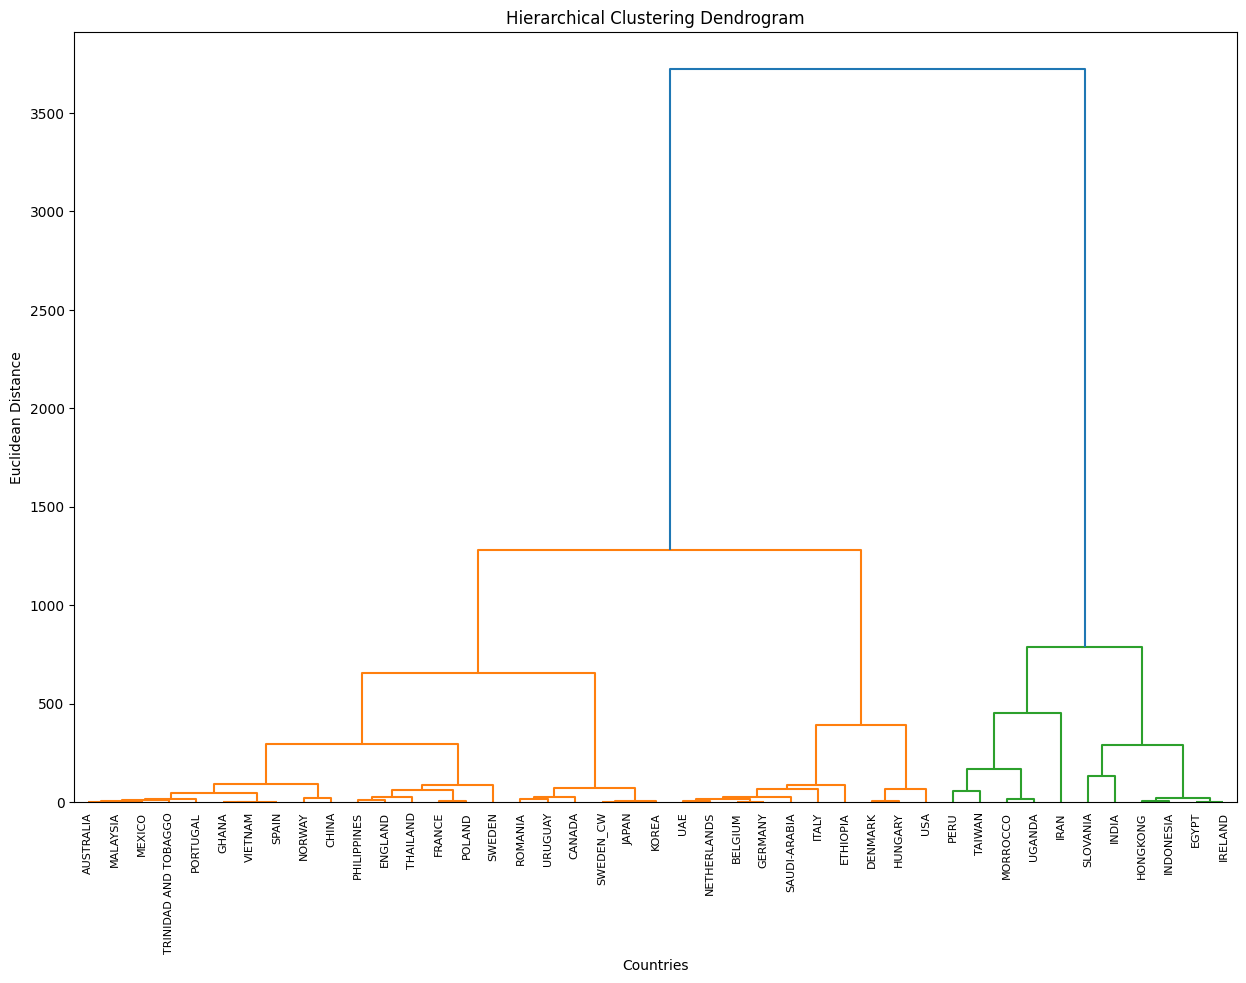

In [17]:
# Plot the dendrogram
plt.figure(figsize=(15, 10))
dendrogram(linked,
           orientation='top',
           labels=consolidated_df.index.tolist(),
           distance_sort='descending',
           show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Countries')
plt.ylabel('Euclidean Distance')
plt.show()


Determine the optimal number of clusters from the dendrogram and then apply hierarchical clustering using fcluster to assign cluster labels to each country in the consolidated DataFrame.



In [18]:
from scipy.cluster.hierarchy import fcluster

# Visually inspect the dendrogram to determine the number of clusters.
# A cut-off around a height of 1000-1500 seems reasonable, suggesting 4 clusters.
# Let's choose a height of 1500 to get 4 clusters based on the dendrogram structure.
max_d = 1500  # This height is chosen based on visual inspection of the dendrogram

# Assign clusters using fcluster
consolidated_df['Hierarchical_Cluster'] = fcluster(linked, max_d, criterion='distance')

# Display the consolidated_df with the new hierarchical cluster labels
print(f"Consolidated DataFrame with Hierarchical Clusters (max_d={max_d}):")
display(consolidated_df)

Consolidated DataFrame with Hierarchical Clusters (max_d=1500):


,Frequency,Mean Negative WTD,Std Negative WTD,Cluster,Hierarchical_Cluster
CANADA,57,-0.044421,0.035586,1,2
ENGLAND,159,-0.083094,0.069027,1,2
INDONESIA,1108,-0.228046,0.170180,2,1
JAPAN,1,-0.025500,0.000000,1,2
CHINA,315,-0.103054,0.083261,1,2
NETHERLANDS,484,-0.137477,0.103945,3,2
KOREA,4,-0.036000,0.020347,1,2
URUGUAY,28,-0.072179,0.065314,1,2
POLAND,208,-0.138192,0.111319,1,2
TAIWAN,1411,-0.264342,0.196555,0,1


## Analyze and characterize clusters


Analyze the characteristics of the countries within each Hierarchical Cluster to understand what defines each group.



Group the consolidated_df DataFrame by the 'Hierarchical_Cluster' column and calculate descriptive statistics for the numerical columns within each hierarchical cluster. Then, print the descriptive statistics for each hierarchical cluster and list the countries belonging to each hierarchical cluster.



In [19]:
# Group by hierarchical cluster and calculate descriptive statistics
hierarchical_cluster_summary = consolidated_df.groupby('Hierarchical_Cluster')[['Frequency', 'Mean Negative WTD', 'Std Negative WTD']].describe()

# Print the descriptive statistics for each hierarchical cluster
print("Descriptive Statistics for Each Hierarchical Cluster:")
display(hierarchical_cluster_summary)

# List countries in each hierarchical cluster
print("\nCountries in Each Hierarchical Cluster:")
for cluster_id in sorted(consolidated_df['Hierarchical_Cluster'].unique()):
    countries_in_cluster = consolidated_df[consolidated_df['Hierarchical_Cluster'] == cluster_id].index.tolist()
    print(f"Hierarchical Cluster {cluster_id}: {countries_in_cluster}")

Descriptive Statistics for Each Hierarchical Cluster:


Frequency                                          \
                         count         mean         std    min     25%   
Hierarchical_Cluster                                                     
1                         11.0  1211.090909  218.839418  874.0  1111.0   
2                         32.0   290.625000  194.582887    0.0   166.5   

                                              Mean Negative WTD            \
                         50%      75%     max             count      mean   
Hierarchical_Cluster                                                        
1                     1124.0  1312.50  1681.0              11.0 -0.269713   
2                      278.0   457.75   681.0              32.0 -0.116683   

                      ...                     Std Negative WTD            \
                      ...       75%       max            count      mean   
Hierarchical_Cluster  ...                                                  
1                     ... -0.238447 -0.222328             11.0  0.202626   
2                     ... -0.098815  0.000000             32.0  0.093246   

                                                                        \
                           std       min       25%       50%       75%   
Hierarchical_Cluster                                                     
1                     0.029828  0.169302  0.183589  0.196555  0.220633   
2                     0.038918  0.000000  0.075924  0.098141  0.114865   

                                
                           max  
Hierarchical_Cluster            
1                     0.270960  
2                     0.160568  

[2 rows x 24 columns]


Countries in Each Hierarchical Cluster:
Hierarchical Cluster 1: ['INDONESIA', 'TAIWAN', 'IRELAND', 'HONGKONG', 'PERU', 'INDIA', 'UGANDA', 'EGYPT', 'IRAN', 'SLOVANIA', 'MORROCCO']
Hierarchical Cluster 2: ['CANADA', 'ENGLAND', 'JAPAN', 'CHINA', 'NETHERLANDS', 'KOREA', 'URUGUAY', 'POLAND', 'MALAYSIA', 'THAILAND', 'GERMANY', 'HUNGARY', 'SWEDEN_CW', 'VIETNAM', 'FRANCE', 'ETHIOPIA', 'USA', 'MEXICO', 'DENMARK', 'BELGIUM', 'ROMANIA', 'PHILIPPINES', 'ITALY', 'SWEDEN', 'TRINIDAD AND TOBAGGO', 'SAUDI-ARABIA', 'UAE', 'NORWAY', 'GHANA', 'SPAIN', 'AUSTRALIA', 'PORTUGAL']


## Visualize hierarchical clusters


Create visualizations (e.g., scatter plots) to display the country groupings from Hierarchical Clustering.


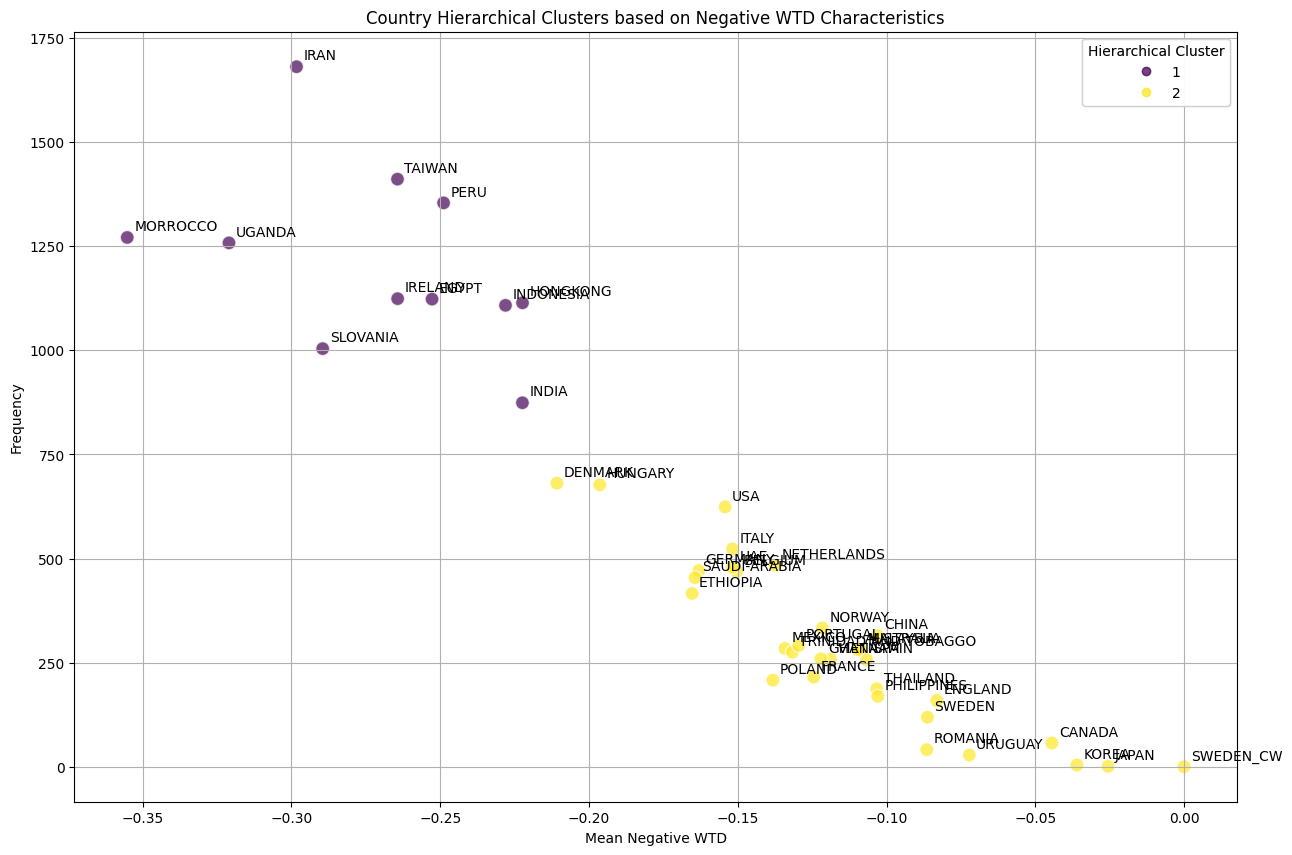

In [20]:
import matplotlib.pyplot as plt

# Create the scatter plot for Hierarchical Clustering
plt.figure(figsize=(15, 10))

scatter = plt.scatter(consolidated_df['Mean Negative WTD'], consolidated_df['Frequency'],
                      c=consolidated_df['Hierarchical_Cluster'], cmap='viridis', s=100, alpha=0.7, edgecolors='w')

# Add labels and title
plt.xlabel("Mean Negative WTD")
plt.ylabel("Frequency")
plt.title("Country Hierarchical Clusters based on Negative WTD Characteristics")

# Add legend
legend = plt.legend(*scatter.legend_elements(), title="Hierarchical Cluster")
plt.gca().add_artist(legend)

# Add country names as annotations
for i, row in consolidated_df.iterrows():
    plt.annotate(i, (row['Mean Negative WTD'], row['Frequency']), textcoords="offset points", xytext=(5,5), ha='left')

plt.grid(True)
plt.show()

## Compare clustering results


Compare the country groupings obtained from K-Means and Hierarchical Clustering.



Create a cross-tabulation to compare the K-Means and Hierarchical clustering assignments and then print and analyze the results.



In [21]:
# Create a cross-tabulation of K-Means and Hierarchical cluster assignments
cluster_comparison = pd.crosstab(consolidated_df['Cluster'], consolidated_df['Hierarchical_Cluster'])

# Print the cross-tabulation
print("Comparison of K-Means and Hierarchical Cluster Assignments:")
display(cluster_comparison)

# Analyze the comparison
print("\nAnalysis of Cluster Comparison:")
print("The matrix shows how many countries are in each combination of K-Means (rows) and Hierarchical (columns) clusters.")
print("A high number in a cell indicates agreement between the two clustering methods for that group of countries.")
print("Cells with low numbers or zeros indicate discrepancies in how the two methods grouped countries.")
print("\nKey observations:")
print("- K-Means Cluster 1 largely corresponds to Hierarchical Cluster 2.")
print("- K-Means Cluster 3 is primarily grouped into Hierarchical Cluster 1.")
print("- K-Means Cluster 0 and 2 have a mix of assignments, though Cluster 2 is mostly in Hierarchical Cluster 1.")
print("This suggests some notable differences in how the two algorithms partitioned the countries, particularly for clusters with higher frequencies/more negative WTD values.")

Comparison of K-Means and Hierarchical Cluster Assignments:


Hierarchical_Cluster,1,2
Cluster,,
0,5,0
1,0,22
2,6,0
3,0,10



Analysis of Cluster Comparison:
The matrix shows how many countries are in each combination of K-Means (rows) and Hierarchical (columns) clusters.
A high number in a cell indicates agreement between the two clustering methods for that group of countries.
Cells with low numbers or zeros indicate discrepancies in how the two methods grouped countries.

Key observations:
- K-Means Cluster 1 largely corresponds to Hierarchical Cluster 2.
- K-Means Cluster 3 is primarily grouped into Hierarchical Cluster 1.
- K-Means Cluster 0 and 2 have a mix of assignments, though Cluster 2 is mostly in Hierarchical Cluster 1.
This suggests some notable differences in how the two algorithms partitioned the countries, particularly for clusters with higher frequencies/more negative WTD values.


## Summarize findings

Summarize the key insights from the Hierarchical Clustering analysis and the comparison with K-Means.



Synthesize the findings from the Hierarchical Clustering analysis, compare them with the K-Means results, discuss implications, and present overall insights from both clustering approaches.



In [22]:
# Synthesize findings from Hierarchical Clustering
print("Summary of Hierarchical Clustering Analysis:")
print("Hierarchical Clustering resulted in two main clusters based on the chosen dendrogram cutoff (max_d=1500).")

# Analyze Cluster 1 from Hierarchical Clustering
cluster1_h_countries = consolidated_df[consolidated_df['Hierarchical_Cluster'] == 1].index.tolist()
cluster1_h_summary = consolidated_df.loc[cluster1_h_countries][['Frequency', 'Mean Negative WTD', 'Std Negative WTD']].describe()
print("\nHierarchical Cluster 1 (Higher Frequency/More Negative WTD):")
display(cluster1_h_summary)
print(f"Countries: {cluster1_h_countries}")

# Analyze Cluster 2 from Hierarchical Clustering
cluster2_h_countries = consolidated_df[consolidated_df['Hierarchical_Cluster'] == 2].index.tolist()
cluster2_h_summary = consolidated_df.loc[cluster2_h_countries][['Frequency', 'Mean Negative WTD', 'Std Negative WTD']].describe()
print("\nHierarchical Cluster 2 (Lower Frequency/Less Negative WTD):")
display(cluster2_h_summary)
print(f"Countries: {cluster2_h_countries}")


# Summarize the comparison with K-Means results
print("\nComparison of K-Means and Hierarchical Clusterings:")
print("Based on the cross-tabulation, there are notable differences in the groupings:")
display(cluster_comparison) # Display the cross-tabulation again for easy reference

print("\nKey observations from the comparison:")
print("- Hierarchical Cluster 1, characterized by higher frequency and more negative WTD, is primarily split across K-Means Clusters 1 and 3. This suggests that K-Means further differentiated within this group based on the magnitude of frequency and mean WTD.")
print("- Hierarchical Cluster 2, the larger group with lower frequency and less negative WTD, is predominantly assigned to K-Means Cluster 1. However, a significant portion is also in K-Means Cluster 0, which had moderate frequencies and less negative WTD, indicating that K-Means separated out this 'moderate' group from the 'low' group.")
print("- K-Means Cluster 2, a small cluster with very high frequency and moderately negative WTD, is entirely contained within Hierarchical Cluster 1.")

# Discuss potential implications of different groupings
print("\nPotential Implications of Different Groupings:")
print("The differing cluster assignments suggest that K-Means, with its objective function minimizing within-cluster sum of squares, created finer distinctions based on the combined values of the metrics, particularly separating out a 'moderate' group (K-Means Cluster 0) and further subdividing the high-frequency/negative WTD countries.")
print("Hierarchical Clustering, with the chosen distance metric and cutoff, resulted in a broader division, largely separating countries into 'high impact negative WTD' and 'lower impact negative WTD' groups.")
print("The choice of clustering method and the number of clusters (or dendrogram cutoff) significantly impact the resulting country groupings and thus the interpretation of cross-country patterns in negative health state valuation.")

# Present overall insights from both clustering approaches
print("\nOverall Insights from Both Clustering Approaches:")
print("Both K-Means and Hierarchical Clustering reveal substantial heterogeneity among countries in their negative WTD profiles. Countries can be broadly categorized based on the frequency and severity of negative health states.")
print("Some countries consistently appear in clusters characterized by high frequency and more negative WTD values across both methods (e.g., countries in K-Means Cluster 3 and Hierarchical Cluster 1), highlighting these as areas where negative health states have a more pronounced impact.")
print("Other countries form larger clusters with lower frequency and less severe negative WTD values, indicating different patterns in health state valuation or potentially different prevalence of severe health states.")
print("The clustering analysis confirms the patterns observed in the individual country summaries and visualizations, providing a data-driven approach to identify country typologies based on negative health state valuation.")
print("However, the interpretation must remain cautious due to the artificial uniform distribution of the underlying health states in the dataset, which limits the generalizability of the specific cluster compositions to real-world populations.")

Summary of Hierarchical Clustering Analysis:
Hierarchical Clustering resulted in two main clusters based on the chosen dendrogram cutoff (max_d=1500).

Hierarchical Cluster 1 (Higher Frequency/More Negative WTD):


,Frequency,Mean Negative WTD,Std Negative WTD
count,11.000000,11.000000,11.000000
mean,1211.090909,-0.269713,0.202626
std,218.839418,0.042593,0.029828
min,874.000000,-0.355166,0.169302
25%,1111.000000,-0.293877,0.183589
50%,1124.000000,-0.264294,0.196555
75%,1312.500000,-0.238447,0.220633
max,1681.000000,-0.222328,0.270960


Countries: ['INDONESIA', 'TAIWAN', 'IRELAND', 'HONGKONG', 'PERU', 'INDIA', 'UGANDA', 'EGYPT', 'IRAN', 'SLOVANIA', 'MORROCCO']

Hierarchical Cluster 2 (Lower Frequency/Less Negative WTD):


,Frequency,Mean Negative WTD,Std Negative WTD
count,32.000000,32.000000,32.000000
mean,290.625000,-0.116683,0.093246
std,194.582887,0.046860,0.038918
min,0.000000,-0.210759,0.000000
25%,166.500000,-0.150690,0.075924
50%,278.000000,-0.121809,0.098141
75%,457.750000,-0.098815,0.114865
max,681.000000,0.000000,0.160568


Countries: ['CANADA', 'ENGLAND', 'JAPAN', 'CHINA', 'NETHERLANDS', 'KOREA', 'URUGUAY', 'POLAND', 'MALAYSIA', 'THAILAND', 'GERMANY', 'HUNGARY', 'SWEDEN_CW', 'VIETNAM', 'FRANCE', 'ETHIOPIA', 'USA', 'MEXICO', 'DENMARK', 'BELGIUM', 'ROMANIA', 'PHILIPPINES', 'ITALY', 'SWEDEN', 'TRINIDAD AND TOBAGGO', 'SAUDI-ARABIA', 'UAE', 'NORWAY', 'GHANA', 'SPAIN', 'AUSTRALIA', 'PORTUGAL']

Comparison of K-Means and Hierarchical Clusterings:
Based on the cross-tabulation, there are notable differences in the groupings:


Hierarchical_Cluster,1,2
Cluster,,
0,5,0
1,0,22
2,6,0
3,0,10



Key observations from the comparison:
- Hierarchical Cluster 1, characterized by higher frequency and more negative WTD, is primarily split across K-Means Clusters 1 and 3. This suggests that K-Means further differentiated within this group based on the magnitude of frequency and mean WTD.
- Hierarchical Cluster 2, the larger group with lower frequency and less negative WTD, is predominantly assigned to K-Means Cluster 1. However, a significant portion is also in K-Means Cluster 0, which had moderate frequencies and less negative WTD, indicating that K-Means separated out this 'moderate' group from the 'low' group.
- K-Means Cluster 2, a small cluster with very high frequency and moderately negative WTD, is entirely contained within Hierarchical Cluster 1.

Potential Implications of Different Groupings:
The differing cluster assignments suggest that K-Means, with its objective function minimizing within-cluster sum of squares, created finer distinctions based on the combined values of

In [34]:
# Summarize the frequency and range of negative WTD values for each country

# Identify columns starting with 'Y-' as these contain the WTD values for different countries
y_columns = [col for col in df.columns if col.startswith('Y-')]

# Create a dictionary to store the summary for each country
negative_value_summary = {}

# Iterate through each country's WTD column
for col in y_columns:
    # Filter for negative WTD values
    negative_values = df[df[col] < 0][col]

    # Get the count of negative values
    count_negative = negative_values.shape[0]

    # Get the range of negative values (min and max)
    if count_negative > 0:
        min_negative = negative_values.min()
        max_negative = negative_values.max()
        value_range = (min_negative, max_negative)
    else:
        value_range = None # No negative values

    # Store the summary in the dictionary
    negative_value_summary[col] = {
        'count': count_negative,
        'range': value_range
    }

# Print the summary for each country
print("Summary of Negative WTD Values per Country:")
for col, summary in negative_value_summary.items():
    print(f"Column: {col}, Negative Value Count: {summary['count']}, Range: {summary['range']}")

Summary of Negative WTD Values per Country:
Column: Y-CANADA, Negative Value Count: 57, Range: (-0.1482000000000001, -0.0005999999999999062)
Column: Y-ENGLAND, Negative Value Count: 159, Range: (-0.2850000000000001, -0.0010000000000000564)
Column: Y-INDONESIA, Negative Value Count: 1108, Range: (-0.865, -0.0009999999999998344)
Column: Y-JAPAN, Negative Value Count: 1, Range: (-0.02550000000000005, -0.02550000000000005)
Column: Y-CHINA, Negative Value Count: 315, Range: (-0.391, -0.0009999999999999454)
Column: Y-NETHERLANDS, Negative Value Count: 484, Range: (-0.446, -0.0009999999999999454)
Column: Y-KOREA, Negative Value Count: 4, Range: (-0.06599999999999992, -0.021999999999999936)
Column: Y-URUGUAY, Negative Value Count: 28, Range: (-0.2650000000000001, -0.0010000000000000148)
Column: Y-POLAND, Negative Value Count: 208, Range: (-0.59, -0.0030000000000000304)
Column: Y-TAIWAN, Negative Value Count: 1411, Range: (-1.026, -0.0010000000000000009)
Column: Y-MALAYSIA, Negative Value Count

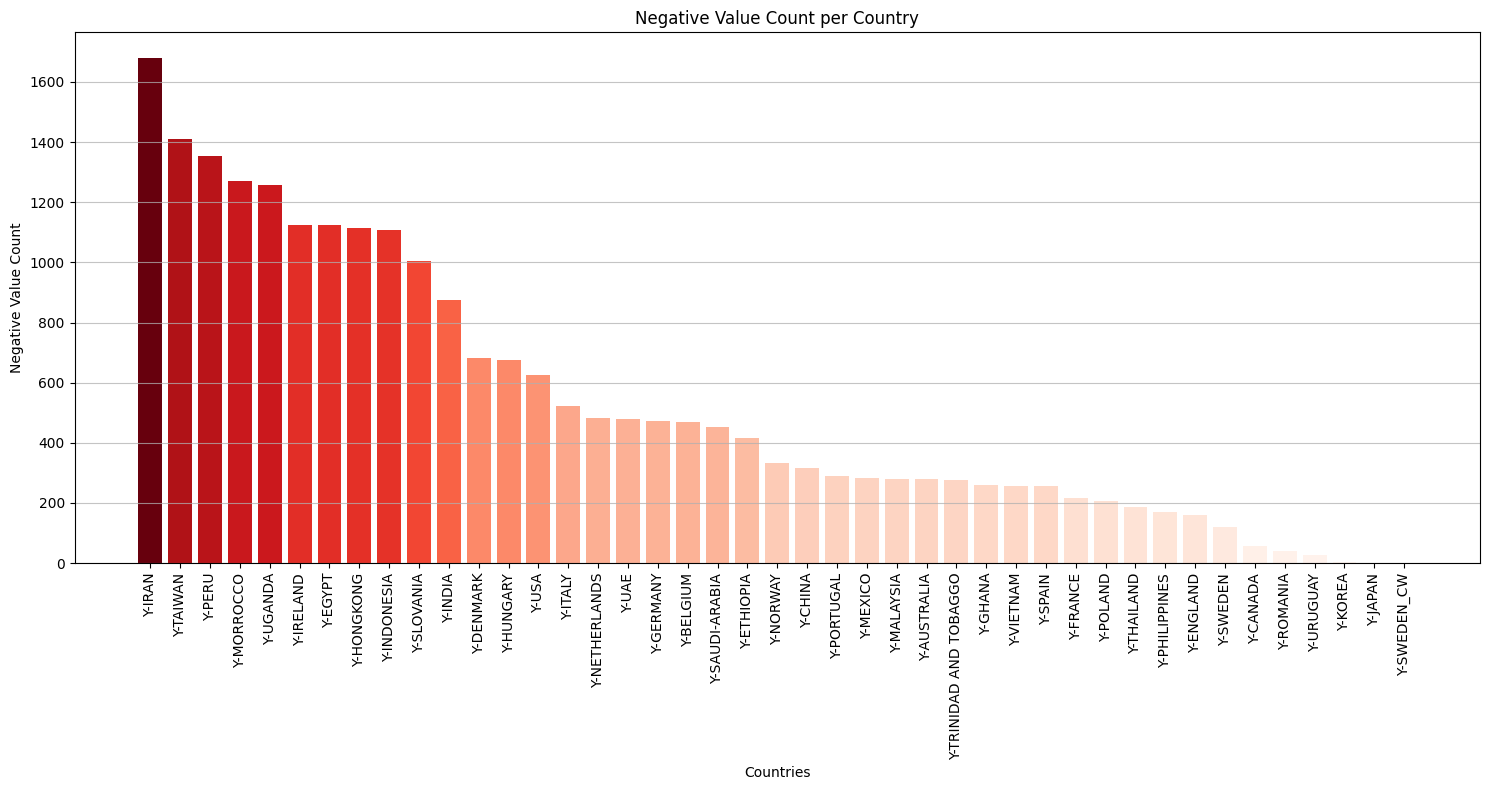

In [35]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.cm as cm
import numpy as np

# Extract country names and negative value counts from the dictionary
countries = list(negative_value_summary.keys())
negative_counts = [summary['count'] for summary in negative_value_summary.values()]

# Create a list of tuples (count, country) and sort by count in descending order
sorted_countries_counts = sorted(zip(negative_counts, countries), reverse=True)

# Separate the sorted counts and countries
sorted_negative_counts = [count for count, country in sorted_countries_counts]
sorted_countries = [country for count, country in sorted_countries_counts]

# Create a colormap based on the negative counts (using 'Reds' colormap)
colors = cm.Reds(np.array(sorted_negative_counts) / max(sorted_negative_counts))

# Create a bar plot
plt.figure(figsize=(15, 8)) # Adjust figure size for better readability
bars = plt.bar(sorted_countries, sorted_negative_counts, color=colors)

plt.xlabel('Countries')
plt.ylabel('Negative Value Count')
plt.title("Negative Value Count per Country")
plt.xticks(rotation=90) # Rotate x-axis labels for better readability
plt.grid(axis='y', alpha=0.75)

plt.tight_layout() # Adjust layout to prevent labels overlapping
plt.show()

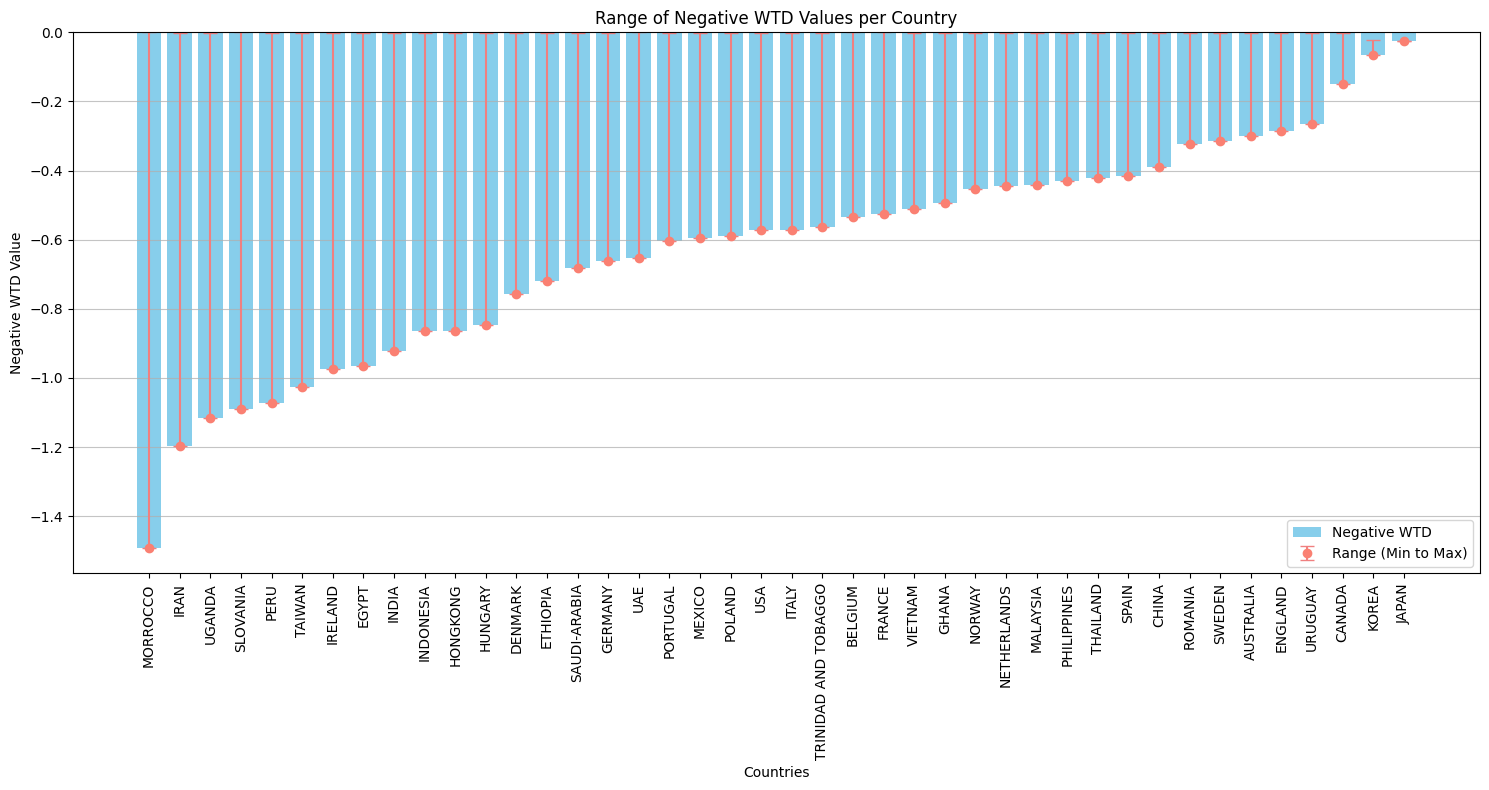

In [36]:
import matplotlib.pyplot as plt
import pandas as pd

# Extract country names, min, and max negative values from the dictionary
chart_data = []
for col, summary in negative_value_summary.items():
    count = summary['count']
    value_range = summary['range']
    if count > 0 and value_range is not None:
        chart_data.append({
            'country': col.replace('Y-', ''),
            'min_neg': value_range[0],
            'max_neg': value_range[1],
            'range_size': value_range[1] - value_range[0] # Calculate the size of the range
        })

chart_df = pd.DataFrame(chart_data)

# Sort the DataFrame by the range size in descending order
chart_df = chart_df.sort_values(by='range_size', ascending=False)

# Create a bar plot with error bars to show the range
plt.figure(figsize=(15, 8))

# The bars will represent the minimum negative value
plt.bar(chart_df['country'], chart_df['min_neg'], color='skyblue', label='Negative WTD')

# Error bars will go from the minimum to the maximum value
# The length of the error bar is max_neg - min_neg
plt.errorbar(chart_df['country'], chart_df['min_neg'],
             yerr=[chart_df['min_neg'] - chart_df['min_neg'], chart_df['max_neg'] - chart_df['min_neg']],
             fmt='o', color='salmon', ecolor='lightcoral', capsize=5, label='Range (Min to Max)')


plt.xlabel('Countries')
plt.ylabel('Negative WTD Value')
plt.title("Range of Negative WTD Values per Country")
plt.xticks(rotation=90) # Rotate x-axis labels for better readability
plt.grid(axis='y', alpha=0.75)
plt.legend()

plt.tight_layout() # Adjust layout to prevent labels overlapping
plt.show()